# Sentiments On Crowd-Flower Brands and Products

# Table of contents

[1. Business Understanding](#1.-Business-Understanding) </br>
[1.1 Business Description](#1.1-Business-Description) </br>
[1.2 Problem Statement](#1.2-Problem-Statement) </br>
[1.3 Main Objective](#1.3-Main-Objective) </br>
[1.4 Specific Objectives](#1.4-Specific-Objectives) </br>
[2. Importing Libraries And Warnings](#2.-Importing-Libraries-And-Warnings) </br>
[3. Data Understanding](#3.-Data-Understanding) </br>
[4. Data Preparation](#4.-Data-Preparation) </br>
[4.1 Visualizing before cleaning](#4.1-Visualizing-Before-Cleaning) </br>
[4.2 Renaming the columns](#4.2-Renaming-the-columns) </br>
[4.3 Missing Values](#4.3-Missing-Values) </br>
[4.4 Duplicates](#4.4-Duplicates) </br>
[4.5 Place Holders](#4.5-Place-Holders) </br>
[4.6 Messy Columns](#4.6-Messy-Columns) </br>
[4.7 White Space](#4.7-White-Space) </br>
[4.8 Visualizing After Cleaning](#4.8-Visualizing-After-Cleaning) </br>
[5. Data Preprocessing](#5.-Data-Preprocessing) </br>
[6. Data Modelling](#6.-Data-Modelling) </br>
[7. Evaluation](#7.-Evaluation) </br>
[8. Recommendations](#8.-Recommendations) </br>
[9. Conclusions](#9.-Conclusions) </br>
[10. Limitations](#10.-Limitations)

# 1. Business Understanding

## 1.1 Business Description

Emotional branding is a strategy that aims to create a strong connection between a product or service and the emotions of the target audience. It can help to build loyalty, trust, and differentiation in a competitive market.

## 1.2 Problem Statement

## 1.3 Main Objective

## 1.4 Specific Objectives

# 2. Importing Libraries And Warnings

In [110]:
# Imports
import re
import nltk
import string
import random
import warnings
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
nltk.download('wordnet')
from nltk import FreqDist
from textblob import TextBlob
from nltk import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from collections import defaultdict
from keras.models import Sequential
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keras import initializers, regularizers, constraints, optimizers, layers, models
from keras.layers import Input, Dense, LSTM, Embedding, Dropout, Activation, Bidirectional, GlobalMaxPool1D, GRU

[nltk_data] Downloading package wordnet to /home/muchiri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 3. Data Understanding

In [111]:
# loading the data
df = pd.read_csv("Data/crowdflower-brands-and-product-emotions/original/judge-1377884607_tweet_product_company.csv", encoding = "latin1")
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [112]:
# Checking the columns
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [113]:
# checking the unique values in the emotion_in_tweet_is_directed_at column
df["emotion_in_tweet_is_directed_at"].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [114]:
# checking the uniques values in is_there_an_emotion_directed_at_a_brand_or_product column
df["is_there_an_emotion_directed_at_a_brand_or_product"].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

## Information about the columns
* tweet_text - It contains information about the text
  
* emotion_in_tweet_is_directed_at - It contains information about the brand </br>
  i.e; </br>
  iPhone </br>
  iPad or iPhone App </br>
  Google Android </br>
  Apple </br>
  Android App </br>
  Other Google product or service </br>
  Other Apple product or service </br>
  
* is_there_an_emotion_directed_at_a_brand_or_product - It contains information about the emotion towards a given brand (will be used as the target) </br>
  i.e; </br>
  Negative emotion </br>
  Positive emotion </br>
  No emotion toward brand or product </br>
  I can't tell </br>

In [115]:
# Data types of the column values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [116]:
# Summarily statistics
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [117]:
# Checking the shape of our data
df.shape

(9093, 3)

In [118]:
# checking the unique values 
df.value_counts(dropna = False)

tweet_text                                                                                                      emotion_in_tweet_is_directed_at  is_there_an_emotion_directed_at_a_brand_or_product
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw               NaN                              No emotion toward brand or product                    4
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW               NaN                              No emotion toward brand or product                    3
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw  Google                           Positive emotion                                      3
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW  NaN                              No emotion toward brand or product                    3


# 4. Data Preparation

## 4.1 Visualizing Before Cleaning

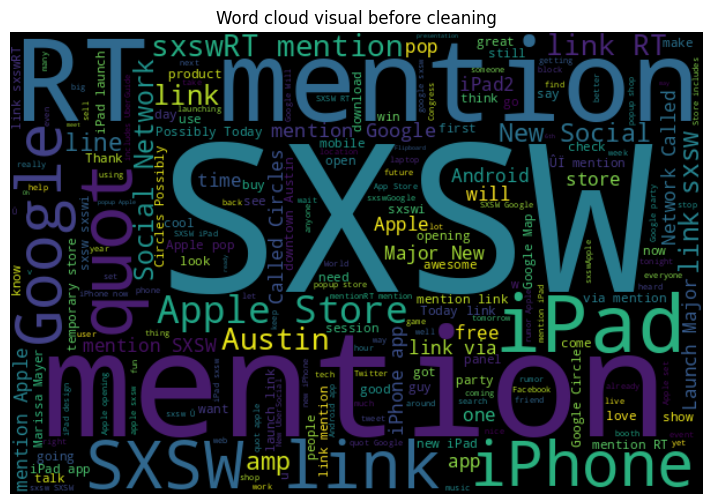

In [119]:
# convert tweet_text values into string to enable plotting of the word cloud
df["tweet_text"] = df["tweet_text"].astype(str)

# plot the figure size
plt.figure(figsize = (10, 6))

# generate a word cloud from the data
word_cloud = WordCloud(width = 600, height = 400).generate("".join(df["tweet_text"]))

# plot
plt.imshow(word_cloud, interpolation = "bilinear")
plt.title("Word cloud visual before cleaning")
plt.axis("off")
plt.show()

## Interpretation </br>
It seems some words do appear more frequent than others: </br>
More frequently appearing words: </br>
1. SXSW </br>
2. mention </br>
3. Google </br>
Less frequently appearing words: </br>
i. block </br>
ii. facebook </br>
iii. well </br>
iv. let </br>
v. come </br>

### Disclaimer: Most less frequently appearing words are stop words which will be dealt with in a few </br>
### N/B: Will see if there will be changes in the word cloud after data cleaning

## 4.2 Renaming the columns

In [120]:
# renaming the columns 
"""
The columns names are too wordy and complex. 
It's better to keep them short and sensible
"""
df.rename(columns = {"tweet_text" : "tweet" , "emotion_in_tweet_is_directed_at" : "brand", \
                     "is_there_an_emotion_directed_at_a_brand_or_product" : "emotion"}, inplace = True)

# display the first 5 rows
df.head()

,tweet,brand,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## 4.3 Missing Values

In [121]:
# Checking missing values and their sum
df.isna().sum()

tweet         0
brand      5802
emotion       0
dtype: int64

In [122]:
# checking brand column missing values percentage
# length of the brand column missing values
brand_missing_len = df["brand"].isna().sum()

# length of the entire column
brand_len = len(df["brand"])

# percentage of missing values in the column
perc_brand = (brand_missing_len / brand_len) * 100

# rounding of the percentage to the nearest 4 d.p
rounded_perc_brand = round(perc_brand, 4)

# showing the results
print("percentage of missing values in brand column:", rounded_perc_brand)

percentage of missing values in brand column: 63.8073


In [123]:
"""
64% of missing values is a lot to be dropped. An ivestigation is required here!
checking if the missing values are related in any way to the other columns.
This will help in knowing what type of missing values they are and the appropriate step to take.
"""

# selecting rows which have missing values in brand column
brand_missing = df[df["brand"].isna()]

In [124]:
# selecting rows in tweet column which have nan values in brand columns
print(brand_missing["tweet"].value_counts(dropna = False))

RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw                                  4
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW                     3
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW                                  3
Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw                                              2
RT @mention ÷¼ Happy Woman's Day! Make love, not fuss! ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter      2
                                                                                                                                  ..
My kind of #sxsw - iPhone plugged into a tree.  @mention The Salt Lick {link}                                                      1
Reports of @mention introducing a new social media platform at #SXSW 

In [125]:
# selecting rows in emotion column which have nan values in brand columns
print(brand_missing["emotion"].value_counts(dropna = False))

No emotion toward brand or product    5298
Positive emotion                       306
I can't tell                           147
Negative emotion                        51
Name: emotion, dtype: int64


## Interpretation

In [126]:
"""
The fact that rows having "No emotion toward brand or product" are the most common with nan values in the brand column makes "sense" 
because the column was supposed to show emotions. If there is none, it means the there is no product/brand there in the brand column.
The best approach in this case would be to rebrand the nan values as "no brand"
"""

'\nThe fact that rows having "No emotion toward brand or product" are the most common with nan values in the brand column makes "sense" \nbecause the column was supposed to show emotions. If there is none, it means the there is no product/brand there in the brand column.\nThe best approach in this case would be to rebrand the nan values as "no brand"\n'

In [127]:
# Filling the missing values using "no brand"
df["brand"].fillna("no brand", inplace = True)

# checking the values of the brand column
print(df["brand"].value_counts(dropna = False))

# checking if there are any missing values
print("number of missing values:", df["brand"].isna().sum())

no brand                           5802
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: brand, dtype: int64
number of missing values: 0


## 4.4 Duplicates

In [128]:
# check for any duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9088    False
9089    False
9090    False
9091    False
9092    False
Length: 9093, dtype: bool

In [129]:
# check number of duplicates
df.duplicated().sum()

22

In [130]:
"""
The duplicates are quite small i.e 22
They can be dropped
"""
df.drop_duplicates(inplace = True)

# checking if there are any more duplicates
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


## 4.5 Place Holders

In [131]:
# checking for place holders
for column in df.columns:
    print(df[column].value_counts(dropna = False))

RT @mention RT @mention It's not a rumor: Apple is opening up a temporary store in downtown Austin for #SXSW and the iPad 2 launch {link}    2
Win free ipad 2 from webdoc.com #sxsw RT                                                                                                     2
Win free iPad 2 from webdoc.com #sxsw RT                                                                                                     2
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw                               2
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW                               2
                                                                                                                                            ..
What matters most: {link} It's all in the title!!! #touchingstories #iPad and/or #tablet #SXSW                                               1

In [132]:
"""
Only the tweet column seems to have place holders.
A function can be written with findall() method to search for all placeholders and subsequently remove them.
"""
# function to search and remove placeholders in tweet column
def tweet_text(text):
    # creating a basic pattern to search through the file for any instances that match the place holders
    pattern = r"[^\w\s]"

    # compile the pattern
    p = re.compile(pattern)

    # use findall() method o look for any place holders
    placeholders = re.findall(p, text)

    # remove all placeholders by replacing them with and empty space
    cleaned_text = re.sub(p, " ", text)

    # return the cleaned text without placeholders
    return cleaned_text
    
# call the function
df["tweet"] = df["tweet"].apply(tweet_text)
df["tweet"].value_counts(dropna = False)

 mention at  sxsw   quot apple comes up with cool technology no one s ever heard of because they don t go to conferences quot   via  mention    2
Win free iPad 2 from webdoc com  sxsw RT                                                                                                        2
 SXSW Google to Launch Major New Social Network Called Circles  Possibly Today by  mention  link  via  mention                                  2
RT  mention Marissa Mayer  Google Will Connect the Digital  amp  Physical Worlds Through Mobile    link   SXSW                                  2
RT  mention Marissa Mayer  Google Will Connect the Digital  amp  Physical Worlds Through Mobile    link   sxsw                                  2
                                                                                                                                               ..
What matters most   link  It s all in the title     touchingstories  iPad and or  tablet  SXSW                              

## 4.7 White Space

In [133]:
# Checking for white space
df_whitespace = [col for col in df.columns if col.strip() != col]
print("Columns with whitespace:", df_whitespace)

Columns with whitespace: []


## 4.9 Visualizing After Cleaning

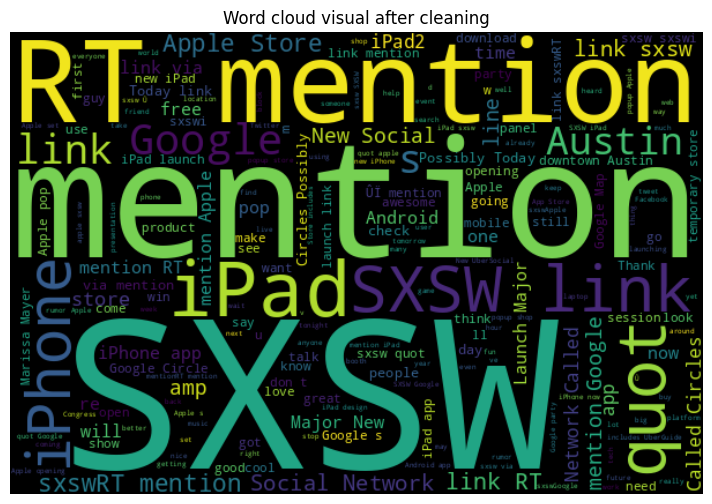

In [134]:
# convert tweet_text values into string to enable plotting of the word cloud
df["tweet"] = df["tweet"].astype(str)

# plot the figure size
plt.figure(figsize = (10, 6))

# generate a word cloud from the data
word_cloud = WordCloud(width = 600, height = 400).generate("".join(df["tweet"]))

# plot
plt.imshow(word_cloud, interpolation = "bilinear")
plt.title("Word cloud visual after cleaning")
plt.axis("off")
plt.show()

### Interpretation

In [135]:
"""
Tables have turned.
Most frequent words:
1. sxsw
2. link
3. mention
Less frequent words:
i. free
ii. ipad
iii. app
"""

'\nTables have turned.\nMost frequent words:\n1. sxsw\n2. link\n3. mention\nLess frequent words:\ni. free\nii. ipad\niii. app\n'

# 5. EDA

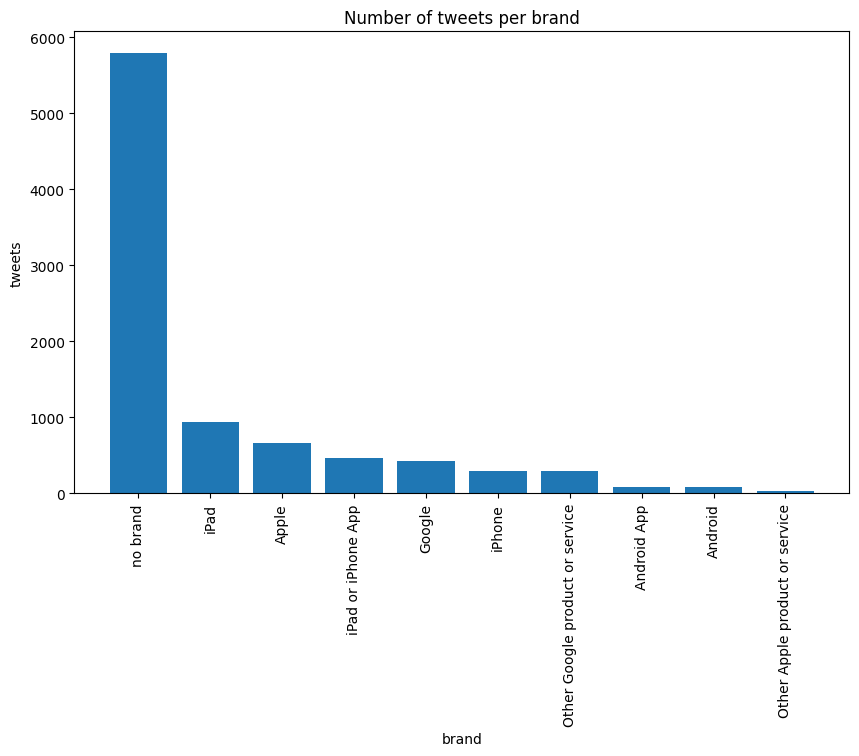

In [136]:
"""
Visual representation of the number of tweets per brand
"""
# plot a bar graph
# plot a figure
plt.figure(figsize = (10, 6))
x = df["brand"].value_counts()
y = x.values
plt.bar(x.index, y)
plt.title("Number of tweets per brand")
plt.xlabel("brand")
plt.ylabel("tweets")
plt.xticks(rotation = 90)
plt.show()

<Figure size 1600x1200 with 0 Axes>

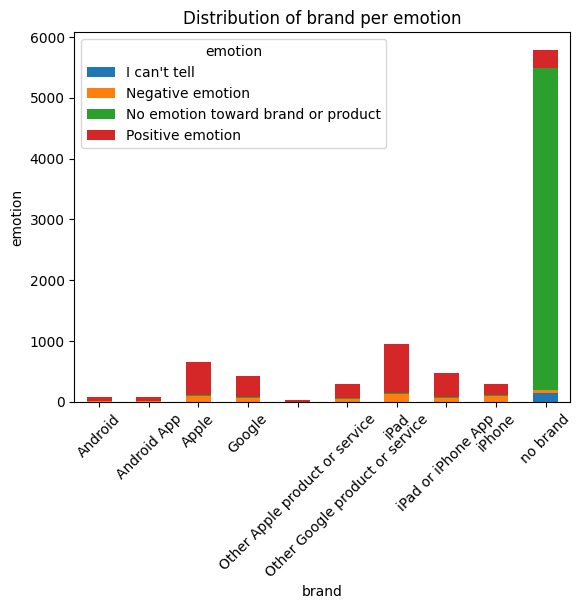

In [137]:
"""
Visual representation of the emotions per brand
"""
# plot a bar graph
# plot a figure
plt.figure(figsize = (16, 12))
x = df.groupby(["brand", "emotion"]).size().unstack(fill_value=0)
x.plot(kind = "bar", stacked = True)
plt.title("Distribution of brand per emotion")
plt.xlabel("brand")
plt.ylabel("emotion")
plt.xticks(rotation = 45)
plt.show()

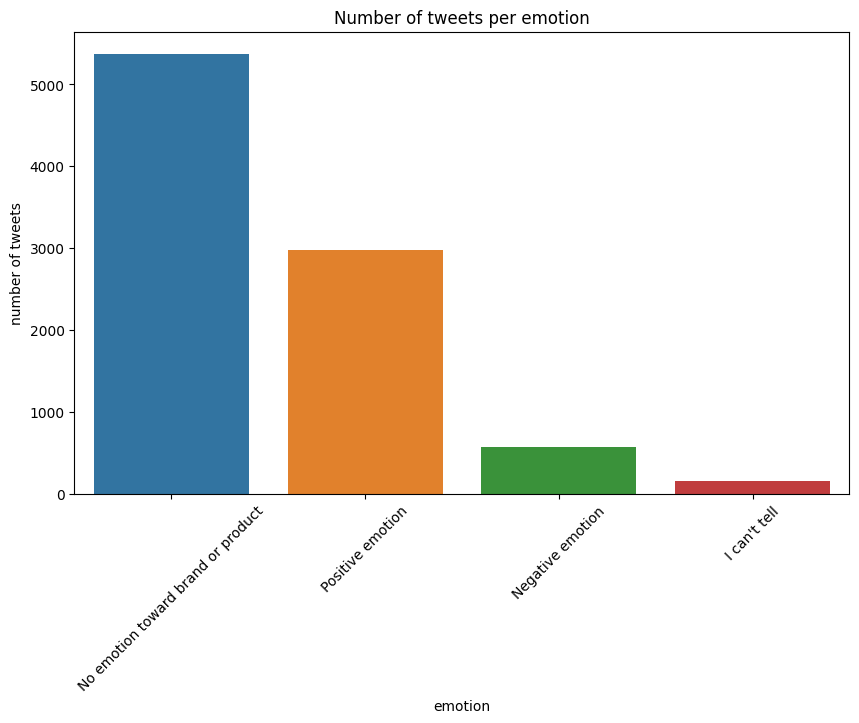

In [138]:
"""
visual representation of the number of tweets per emotion
"""
plt.figure(figsize = (10, 6))
emotions_count = df["emotion"].value_counts()
sns.barplot(x = emotions_count.index, y = emotions_count.values)
plt.title("Number of tweets per emotion")
plt.xlabel("emotion")
plt.ylabel("number of tweets")
plt.xticks(rotation = 45)
plt.show()

In [139]:
# getting the 10 most common words 
freqdist = FreqDist(df["tweet"])
most_common = freqdist.most_common(10)
most_common

[(' mention at  sxsw   quot apple comes up with cool technology no one s ever heard of because they don t go to conferences quot   via  mention',
  2),
 (' SXSW Google to Launch Major New Social Network Called Circles  Possibly Today by  mention  link  via  mention',
  2),
 ('Win free ipad 2 from webdoc com  sxsw RT', 2),
 ('Win free iPad 2 from webdoc com  sxsw RT', 2),
 ('RT  mention Marissa Mayer  Google Will Connect the Digital  amp  Physical Worlds Through Mobile    link   sxsw',
  2),
 ('RT  mention Marissa Mayer  Google Will Connect the Digital  amp  Physical Worlds Through Mobile    link   SXSW',
  2),
 ('RT  mention RT  mention It s not a rumor  Apple is opening up a temporary store in downtown Austin for  SXSW and the iPad 2 launch  link ',
  2),
 ('  wesley83 I have a 3G iPhone  After 3 hrs tweeting at  RISE_Austin  it was dead   I need to upgrade  Plugin stations at  SXSW ',
  1),
 (' jessedee Know about  fludapp   Awesome iPad iPhone app that you ll likely appreciate for i

<Figure size 1000x600 with 0 Axes>

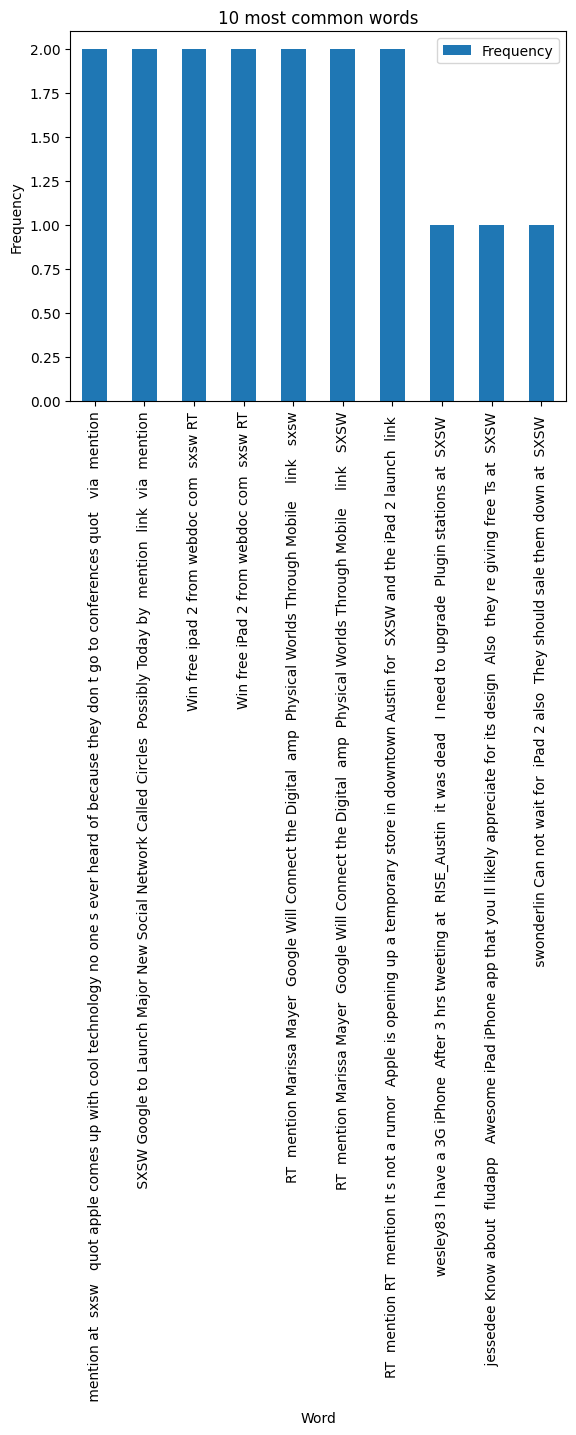

In [140]:
# creating a dataframe for the most common words
most_common_df = pd.DataFrame(most_common, columns = ["Word", "Frequency"])

# plotting the size 
plt.figure(figsize = (10, 6))

# creating a bar graph
most_common_df.plot(kind = "bar", x = "Word", y = "Frequency")

# labelling the bar graph
plt.title("10 most common words")
plt.xlabel("Word")
plt.ylabel("Frequency")

# rotating the x-axis
plt.xticks(rotation = 90)

# display the visual
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

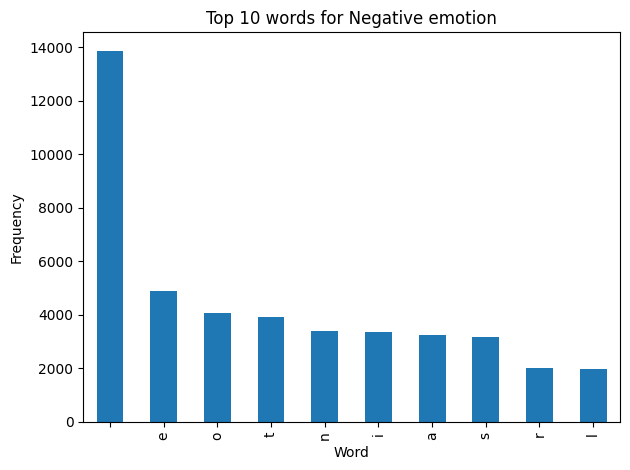

<Figure size 1000x600 with 0 Axes>

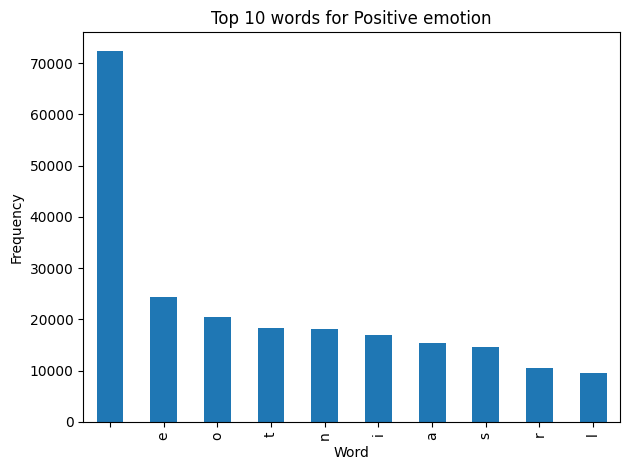

In [141]:
# Initialize dictionaries to store word frequencies for each emotion
emotion_word_frequencies = defaultdict(lambda: defaultdict(int))

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    emotion = row['emotion']
    tweet_words = row['tweet']
    
    # Update word frequencies for the corresponding emotion
    for word in tweet_words:
        emotion_word_frequencies[emotion][word] += 1

# Filter out common and rare words, if desired
# For example, you can remove stop words and words that appear fewer than N times

# Define the emotions you want to visualize
emotions_to_visualize = ['Negative emotion', 'Positive emotion']  # Add more as needed

# Define the number of top words to consider
num_top_words = 10  # Adjust as needed

# Create bar graphs for each emotion
for emotion in emotions_to_visualize:
    word_frequencies = emotion_word_frequencies[emotion]
    sorted_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)
    
    # Extract the top words and their frequencies
    top_words = [word for word, freq in sorted_words[:num_top_words]]
    top_frequencies = [freq for word, freq in sorted_words[:num_top_words]]
    
    # Create a DataFrame for the most common words for the current emotion
    most_common_df = pd.DataFrame({'Word': top_words, 'Frequency': top_frequencies})
    
    # Create a bar graph
    plt.figure(figsize=(10, 6))
    most_common_df.plot(kind="bar", x="Word", y="Frequency", legend=False)
    
    # Label the bar graph
    plt.title(f"Top {num_top_words} words for {emotion}")
    plt.xlabel("Word")
    plt.ylabel("Frequency")
    
    # Rotate the x-axis labels for better visibility
    plt.xticks(rotation=90)
    
    # Display the visual
    plt.tight_layout()
    plt.show()

# 6. Data Preprocessing 

## 6.1 Stop Words

In [142]:
"""
Words such as "the, and, of, is etc in the data add little or no value to the data.
Here, the data is tokenized to make it easier to remove the stop words
A list comprehension will be used to omit any token not in stop_words variable below
"""
# get English stop words
stop_words = set(stopwords.words("english"))

# creating tokens in tweet column
df["tweet"] = df["tweet"].apply(lambda X: word_tokenize(X))

# lowercase all tokens
df["tweet"] = df["tweet"].apply(lambda tokens: [w.lower() for w in tokens if w.lower() not in stop_words])

# show the result
print(df["tweet"])

0       [wesley83, 3g, iphone, 3, hrs, tweeting, rise_...
1       [jessedee, know, fludapp, awesome, ipad, iphon...
2           [swonderlin, wait, ipad, 2, also, sale, sxsw]
3       [sxsw, hope, year, festival, crashy, year, iph...
4       [sxtxstate, great, stuff, fri, sxsw, marissa, ...
                              ...                        
9088                       [ipad, everywhere, sxsw, link]
9089    [wave, buzz, rt, mention, interrupt, regularly...
9090    [google, zeiger, physician, never, reported, p...
9091    [verizon, iphone, customers, complained, time,...
9092    [ï, ïà, ü_, ê, î, ò, á, ââ, _, â_, ûârt, menti...
Name: tweet, Length: 9071, dtype: object


## 6.2 Lemmatization

In [143]:
"""
It's better than stemming since it word forms to determine the base or dictionary form rather than chopping off the last part of a sentence
whether it's grammatically correct or not like stemming
"""
# instantiating lemmatizer
lemmatizer = WordNetLemmatizer()

# function to lemmatize tweet column words
def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# calling the function
df["tweet"] = df["tweet"].apply(lemmatize_text)
df["tweet"]

0       [wesley83, 3g, iphone, 3, hr, tweeting, rise_a...
1       [jessedee, know, fludapp, awesome, ipad, iphon...
2           [swonderlin, wait, ipad, 2, also, sale, sxsw]
3       [sxsw, hope, year, festival, crashy, year, iph...
4       [sxtxstate, great, stuff, fri, sxsw, marissa, ...
                              ...                        
9088                       [ipad, everywhere, sxsw, link]
9089    [wave, buzz, rt, mention, interrupt, regularly...
9090    [google, zeiger, physician, never, reported, p...
9091    [verizon, iphone, customer, complained, time, ...
9092    [ï, ïà, ü_, ê, î, ò, á, ââ, _, â_, ûârt, menti...
Name: tweet, Length: 9071, dtype: object

## 6.3 Feature Engineering

In [144]:
# from sklearn.feature_selection import SelectKBest, f_classif

# # intializing TF-IDF vectorizer with a maximum of 4,000 words
# max_features = 4000
# vectorizer = TfidfVectorizer(max_features=max_features)

# # converting token lists to strings
# df["tweet"] = df["tweet"].str.join(" ")

# # Transforming the tweet column
# tweet_vectorized = vectorizer.fit_transform(df["tweet"])

# # Create a SelectKBest transformer to select top features
# k_best = SelectKBest(score_func=f_classif, k=max_features)

# # Fit and transform the TF-IDF vectors
# tweet_vectorized_selected = k_best.fit_transform(tweet_vectorized, df["emotion"])

# # Replace the "tweet" column with the selected TF-IDF features
# df["tweet"] = list(tweet_vectorized_selected.toarray())

In [145]:
# from sklearn.feature_selection import SelectKBest, f_classif

# # intializing TF-IDF vectorizer with a maximum of 10,000 words
# max_features = 7000
# vectorizer = TfidfVectorizer(max_features=max_features)

# # converting token lists to strings
# df["tweet"] = df["tweet"].str.join(" ")

# # Transforming the tweet column
# tweet_vectorized = vectorizer.fit_transform(df["tweet"])

# # Create a SelectKBest transformer to select top features
# k_best = SelectKBest(score_func=f_classif, k=max_features)

# # Fit and transform the TF-IDF vectors
# tweet_vectorized_selected = k_best.fit_transform(tweet_vectorized, df["emotion"])

# # Replace the "tweet" column with the selected TF-IDF features
# df["tweet"] = list(tweet_vectorized_selected.toarray())

# # Sort features by their TF-IDF scores in descending order
# feature_names = vectorizer.get_feature_names_out()
# tfidf_scores = tweet_vectorized_selected.sum(axis=0).A1
# sorted_indices = tfidf_scores.argsort()[::-1]

# # Number of top features you want to print
# top_n = 10  # You can change this number as needed

# # Print the top features and their TF-IDF scores
# for i in range(top_n):
#     feature_index = sorted_indices[i]
#     feature_name = feature_names[feature_index]
#     tfidf_score = tfidf_scores[feature_index]
#     print(f"Feature: {feature_name}, TF-IDF Score: {tfidf_score:.4f}")

In [146]:
# # Display tweet columns
# unique_values = df["tweet"].apply(tuple).unique()
# unique_values

## 6.4 Padding and vectorizing

In [147]:
# Convert the tokenized and processed text data back to a DataFrame
#df["tweet"] = df["tweet"].apply(lambda tokens: ' '.join(tokens))

df["tweet_numeric"] = df["tweet"].apply(lambda tokens: ' '.join(map(str, tokens)))

# Create a max sequence length
max_sequence_length = 100

# Create a vocabulary of unique tokens
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["tweet_numeric"])
vocab_size = len(tokenizer.word_index) + 1

# Convert text to integer sequences
sequences = tokenizer.texts_to_sequences(df["tweet_numeric"])

# Pad sequences to the fixed length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Assign the padded sequences back to the DataFrame
df["tweet_numeric"] = list(padded_sequences)

# Display the unique
unique_values = df["tweet_numeric"].apply(tuple).unique()
unique_values

array([(5172, 487, 9, 61, 1978, 515, 1079, 13, 752, 46, 947, 2303, 1011, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (5173, 58, 5174, 94, 6, 9, 15, 948, 1979, 89, 165, 186, 28, 3478, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (5175, 170, 6, 11, 165, 300, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       ...,
  

## 6.5 Label encoding

In [148]:
"""
Converting both the target and brand columns to numeric. 
They are both discrete
"""

'\nConverting both the target and brand columns to numeric. \nThey are both discrete\n'

In [149]:
# instialize the label encoding
label_encoder = LabelEncoder()

# The tweet column will be converted to numeric using word embedding in a moment
columns_to_label_encode = df.drop("tweet", axis = 1)

# converting brand column to numeric
df["brand_numeric"] = label_encoder.fit_transform(df["brand"])

# mapping the labels
brand_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# print the mapping
print(brand_mapping)

# space out the output
print(" ")

# converting emotion column to numeric
df["emotion_numeric"] = label_encoder.fit_transform(df["emotion"])

# mapping the labels
emotion_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# print the mapping
print(emotion_mapping)

{'Android': 0, 'Android App': 1, 'Apple': 2, 'Google': 3, 'Other Apple product or service': 4, 'Other Google product or service': 5, 'iPad': 6, 'iPad or iPhone App': 7, 'iPhone': 8, 'no brand': 9}
 
{"I can't tell": 0, 'Negative emotion': 1, 'No emotion toward brand or product': 2, 'Positive emotion': 3}


In [150]:
# checking out the work so far
df.head()

,tweet,brand,emotion,tweet_numeric,brand_numeric,emotion_numeric
0,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a...",iPhone,Negative emotion,"[5172, 487, 9, 61, 1978, 515, 1079, 13, 752, 4...",8,1
1,"[jessedee, know, fludapp, awesome, ipad, iphon...",iPad or iPhone App,Positive emotion,"[5173, 58, 5174, 94, 6, 9, 15, 948, 1979, 89, ...",7,3
2,"[swonderlin, wait, ipad, 2, also, sale, sxsw]",iPad,Positive emotion,"[5175, 170, 6, 11, 165, 300, 1, 0, 0, 0, 0, 0,...",6,3
3,"[sxsw, hope, year, festival, crashy, year, iph...",iPad or iPhone App,Negative emotion,"[1, 250, 68, 461, 3479, 68, 9, 15, 1, 0, 0, 0,...",7,1
4,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",Google,Positive emotion,"[1262, 53, 400, 1532, 1, 59, 56, 5, 721, 1263,...",3,3


## 6.6 Class Imbalance

In [151]:
print(emotion_mapping)

# Checking for class imbalance in the target(emotion)
df["emotion_numeric"].value_counts()

{"I can't tell": 0, 'Negative emotion': 1, 'No emotion toward brand or product': 2, 'Positive emotion': 3}


2    5376
3    2970
1     569
0     156
Name: emotion_numeric, dtype: int64

In [152]:
"""
There is class imbalance between the first two "No emotion toward brand or product" and "positive emotion" and the last two 
i.e "I can't tell" and "negative emotion"
Percentages can help to prove this further.
"""

'\nThere is class imbalance between the first two "No emotion toward brand or product" and "positive emotion" and the last two \ni.e "I can\'t tell" and "negative emotion"\nPercentages can help to prove this further.\n'

In [153]:
# percentage of 0 and 1 vs 2 and 3
# 0 and 1
len_0 = len(df.loc[df["emotion_numeric"] == 0]) 
len_1 = len(df.loc[df["emotion_numeric"] == 1])
len_0_and_1 = np.add(len_0, len_1)
perc_len_0_and_1 = (len_0_and_1 / len(df["emotion_numeric"])) * 100
rounded_perc_len_0_and_1 = round(perc_len_0_and_1, 4)

# 2 and 3
len_2 = len(df.loc[df["emotion_numeric"] == 2])
len_3 = len(df.loc[df["emotion_numeric"] == 3])
len_2_and_3 = np.add(len_2, len_3)
perc_len_2_and_3 = (len_2_and_3 / len(df["emotion_numeric"])) * 100
rounded_perc_len_2_and_3 = round(perc_len_2_and_3, 4)

print(f"The percentage of 0 and 1(I can't tell and negative emotion is):", {rounded_perc_len_0_and_1}, "%", "while the pecentage \
of 2 and 3 (No emotion toward brand or product and positive emotion is):", {rounded_perc_len_2_and_3}, "%")

The percentage of 0 and 1(I can't tell and negative emotion is): {7.9925} % while the pecentage of 2 and 3 (No emotion toward brand or product and positive emotion is): {92.0075} %


In [154]:
df["emotion_numeric"].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       3
2       3
3       1
4       3
       ..
9088    3
9089    2
9090    2
9091    2
9092    2
Name: emotion_numeric, Length: 9071, dtype: int64>

In [155]:
#df["tweet_numeric"].unique()

In [156]:
# Initialize smote
smote = SMOTE()

# features
x = df["tweet_numeric"].tolist()

# target
y = df["emotion_numeric"]

# split the data 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# using smote to balance the data
X_train_balance, y_train_balance = smote.fit_resample(X_train, y_train)

# print the results
print(pd.Series(y_train_balance).value_counts())

2    4330
3    4330
1    4330
0    4330
Name: emotion_numeric, dtype: int64


# 7. Data Modelling

## 7.1 LSTM

In [157]:
X_train_balance = np.array(X_train_balance)
X_test = np.array(X_test)

# Ensure that target labels are encoded for four classes
y_train_balance_encoded = to_categorical(y_train_balance, num_classes=4)
y_test_encoded = to_categorical(y_test, num_classes=4)

# Assuming y_train_balance_encoded is a list, convert it to a NumPy array
y_train_balance_encoded = np.array(y_train_balance_encoded)

In [158]:
# Define the model architecture
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim = 95000, output_dim = 64))
lstm_model.add(LSTM(128, activation='relu'))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(4, activation='softmax'))

# Compile the model
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

# Train the model
lstm_history = lstm_model.fit(X_train_balance, y_train_balance_encoded, epochs = 10, batch_size = 64, validation_data = (X_test, y_test_encoded))

Epoch 1/10
271/271 [==============================] - 72s 214ms/step - loss: 1.3865 - accuracy: 0.2496 - val_loss: 1.3802 - val_accuracy: 0.5763
Epoch 2/10
271/271 [==============================] - 56s 208ms/step - loss: 1.3864 - accuracy: 0.2466 - val_loss: 1.3871 - val_accuracy: 0.0711
Epoch 3/10
271/271 [==============================] - 50s 183ms/step - loss: 1.3864 - accuracy: 0.2458 - val_loss: 1.3878 - val_accuracy: 0.0711
Epoch 4/10
271/271 [==============================] - 52s 190ms/step - loss: 1.3864 - accuracy: 0.2458 - val_loss: 1.3895 - val_accuracy: 0.0711
Epoch 5/10
271/271 [==============================] - 49s 180ms/step - loss: 1.3864 - accuracy: 0.2473 - val_loss: 1.3866 - val_accuracy: 0.3344
Epoch 6/10
271/271 [==============================] - 47s 174ms/step - loss: 1.3864 - accuracy: 0.2508 - val_loss: 1.3869 - val_accuracy: 0.0711
Epoch 7/10
271/271 [==============================] - 47s 174ms/step - loss: 1.3864 - accuracy: 0.2464 - val_loss: 1.3879 - val_ac

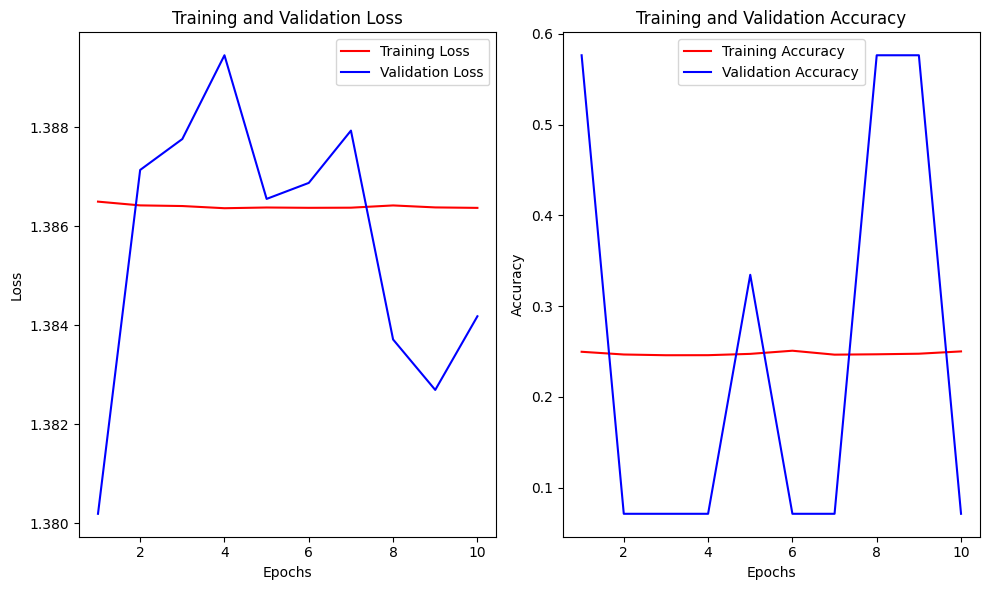

In [159]:
# Access the loss and accuracy history
loss = lstm_history.history['loss']
accuracy = lstm_history.history['accuracy']

# Access validation loss and accuracy if available
val_loss = lstm_history.history.get('val_loss')
val_accuracy = lstm_history.history.get('val_accuracy')

# Create a list of epochs for the x-axis
epochs = range(1, len(loss) + 1)

# Plot training loss
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training Loss')
if val_loss:
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
if val_accuracy:
    plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## 7.2 GRUs

In [160]:
# Define the model architecture with a GRU layer
gru_model = Sequential()
gru_model.add(Embedding(input_dim = 95000, output_dim=64))
gru_model.add(GRU(128, activation='relu'))  # Replace LSTM with GRU
gru_model.add(Dense(64, activation='relu'))
gru_model.add(Dense(4, activation='softmax'))

# Compile the model
gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

# Train the model
gru_history = gru_model.fit(X_train_balance, y_train_balance_encoded, epochs=10, batch_size=64, validation_data=(X_test, y_test_encoded))

Epoch 1/10
271/271 [==============================] - 45s 156ms/step - loss: 1.3867 - accuracy: 0.2452 - val_loss: 1.3876 - val_accuracy: 0.0711
Epoch 2/10
271/271 [==============================] - 43s 159ms/step - loss: 1.3865 - accuracy: 0.2435 - val_loss: 1.3888 - val_accuracy: 0.0182
Epoch 3/10
271/271 [==============================] - 42s 156ms/step - loss: 1.3864 - accuracy: 0.2444 - val_loss: 1.3866 - val_accuracy: 0.0711
Epoch 4/10
271/271 [==============================] - 42s 156ms/step - loss: 1.3864 - accuracy: 0.2473 - val_loss: 1.3867 - val_accuracy: 0.0711
Epoch 5/10
271/271 [==============================] - 42s 156ms/step - loss: 1.3864 - accuracy: 0.2491 - val_loss: 1.3854 - val_accuracy: 0.0182
Epoch 6/10
271/271 [==============================] - 42s 156ms/step - loss: 1.3864 - accuracy: 0.2508 - val_loss: 1.3842 - val_accuracy: 0.3344
Epoch 7/10
271/271 [==============================] - 42s 157ms/step - loss: 1.3864 - accuracy: 0.2479 - val_loss: 1.3864 - val_ac

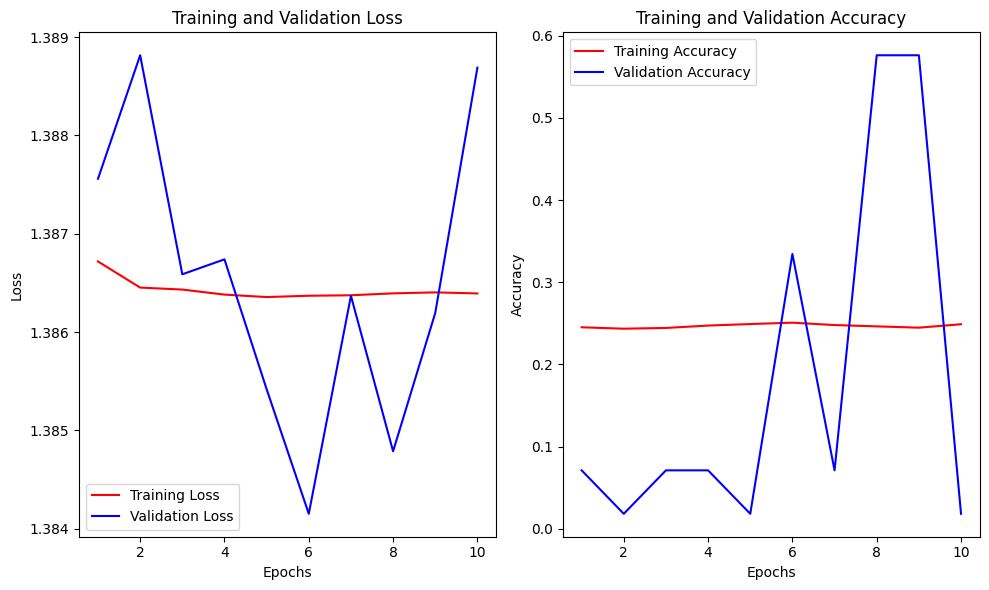

In [161]:
# Access the loss and accuracy history
loss = gru_history.history['loss']
accuracy = gru_history.history['accuracy']

# Access validation loss and accuracy if available
val_loss = gru_history.history.get('val_loss')
val_accuracy = gru_history.history.get('val_accuracy')

# Create a list of epochs for the x-axis
epochs = range(1, len(loss) + 1)

# Plot training loss
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training Loss')
if val_loss:
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
if val_accuracy:
    plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## 7.3 Textblob (Polarity)

In [162]:
df["tweet"] = df["tweet"].astype(str)
df["polarity"] = df["tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["sentiment_textblob"] = df["polarity"].apply(lambda x: "positive" if x > 0 else ("negative" if x < 0 else "neutral"))

df.head(5)

,tweet,brand,emotion,tweet_numeric,brand_numeric,emotion_numeric,polarity,sentiment_textblob
0,"['wesley83', '3g', 'iphone', '3', 'hr', 'tweet...",iPhone,Negative emotion,"[5172, 487, 9, 61, 1978, 515, 1079, 13, 752, 4...",8,1,-0.200000,negative
1,"['jessedee', 'know', 'fludapp', 'awesome', 'ip...",iPad or iPhone App,Positive emotion,"[5173, 58, 5174, 94, 6, 9, 15, 948, 1979, 89, ...",7,3,0.466667,positive
2,"['swonderlin', 'wait', 'ipad', '2', 'also', 's...",iPad,Positive emotion,"[5175, 170, 6, 11, 165, 300, 1, 0, 0, 0, 0, 0,...",6,3,0.000000,neutral
3,"['sxsw', 'hope', 'year', 'festival', 'crashy',...",iPad or iPhone App,Negative emotion,"[1, 250, 68, 461, 3479, 68, 9, 15, 1, 0, 0, 0,...",7,1,0.000000,neutral
4,"['sxtxstate', 'great', 'stuff', 'fri', 'sxsw',...",Google,Positive emotion,"[1262, 53, 400, 1532, 1, 59, 56, 5, 721, 1263,...",3,3,0.800000,positive


positive    4457
neutral     3799
negative     815
Name: sentiment_textblob, dtype: int64


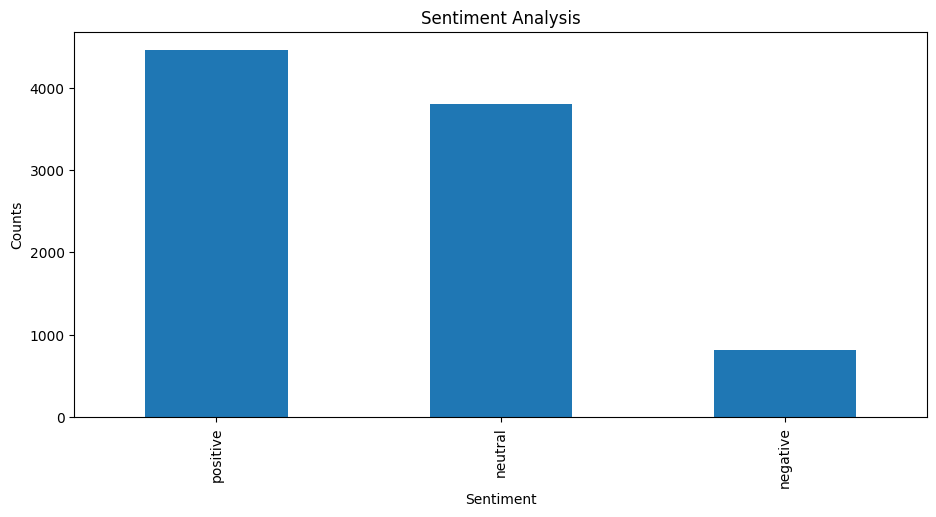

In [163]:
# Show the value counts
print(df['sentiment_textblob'].value_counts())

# bar plot showing the sentiment categories
plt.subplots(figsize= (11, 5))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['sentiment_textblob'].value_counts().plot(kind='bar')
plt.show()

## 7.4 Neural Network 

Epoch 1/20
542/542 [==============================] - 2s 2ms/step - loss: 10.2050 - accuracy: 0.2546
Epoch 2/20
542/542 [==============================] - 1s 2ms/step - loss: 2.5021 - accuracy: 0.2436
Epoch 3/20
542/542 [==============================] - 1s 3ms/step - loss: 2.4540 - accuracy: 0.2484
Epoch 4/20
542/542 [==============================] - 1s 2ms/step - loss: 2.3842 - accuracy: 0.2493
Epoch 5/20
542/542 [==============================] - 1s 2ms/step - loss: 2.3068 - accuracy: 0.2458
Epoch 6/20
542/542 [==============================] - 1s 2ms/step - loss: 2.2302 - accuracy: 0.2446
Epoch 7/20
542/542 [==============================] - 1s 2ms/step - loss: 2.1371 - accuracy: 0.2490
Epoch 8/20
542/542 [==============================] - 1s 2ms/step - loss: 2.0415 - accuracy: 0.2464
Epoch 9/20
542/542 [==============================] - 1s 2ms/step - loss: 1.9425 - accuracy: 0.2512
Epoch 10/20
542/542 [==============================] - 1s 2ms/step - loss: 1.8462 - accuracy: 0.247

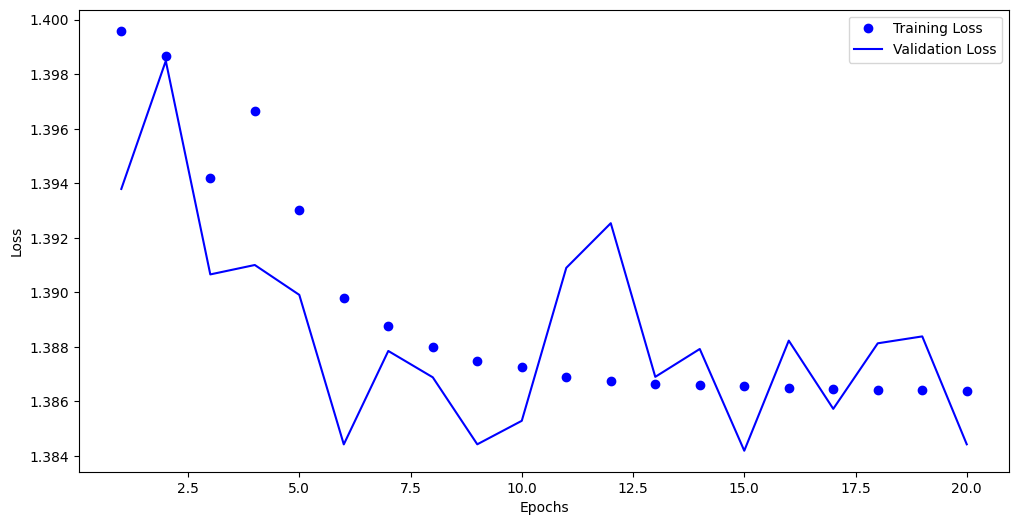

In [169]:
from tensorflow.keras import models, layers
from keras.optimizers import Adam

# Define the model
model = models.Sequential()

# Add input layer
model.add(layers.Dense(units=100, activation="relu", input_shape=(100,)))

# Add hidden layers
model.add(layers.Dense(units=64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(units=32, activation="relu", kernel_regularizer=regularizers.l2(0.01)))

# Add dropout layer to the input layer
model.add(layers.Dropout(0.3))  # Dropout applied to the input layer

# Add output layer with appropriate units and activation function
model.add(layers.Dense(units=4, activation="softmax"))

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# Fit the model
model.fit(X_train_balance, y_train_balance_encoded, batch_size=32, epochs=20)

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train_balance, y_train_balance_encoded, epochs=20, batch_size=32, validation_data=(X_test, y_test_encoded))

# Plot training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 8. Evaluation

# 9. Recommendations

# 10. Conclusions

# 11. Limitations